# Chapter 2.  Tabular Value-Based Reinforcement Learning

In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

## 2.1.  Q-learning
- Implement Q-learning for Taxi, including the procedure to derive the best policy for the Q-table.
- Print the Q-table, to see the values on the squares. You could print a live policy as the search progresses.
- Try different values for $\varepsilon$, the exploration rate. Does it learn faster? Does it keep finding the optimal solution?
- Try different values for $\alpha$, the learning rate. Is it faster?

In [35]:
def taxi_qlearning(gamma=0.7, alpha=0.2, epsilon=0.1, epilogues=1000, show_log=True):
    env = gym.make("Taxi-v3")
    env.reset()
    if show_log:
        env.render()

    # Q[state, action] table implementation
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    x = []
    rewards_history = []

    for episode in range(0, epilogues+1):
        done = False
        total_reward = 0
        state = env.reset()
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore state space
            else:
                action = np.argmax(Q[state])  # Exploit learned values
            next_state, reward, done, info = env.step(action)  # invoke Gym
            next_max = np.max(Q[next_state])
            old_value = Q[state, action]

            new_value = old_value + alpha * (reward + gamma * next_max - old_value)

            Q[state, action] = new_value
            total_reward += reward
            state = next_state

        if episode % 100 == 0:
            x.append(episode)
            rewards_history.append(total_reward)            
            if show_log:
                print(f"Episode {episode} Total Reward: {total_reward}")
    
    return Q, x, rewards_history

In [36]:
Q, _, __ = taxi_qlearning()
print("\n", "Q.shape:", Q.shape, "\n")
print(Q)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 0 Total Reward: -533
Episode 100 Total Reward: -136
Episode 200 Total Reward: -112
Episode 300 Total Reward: -123
Episode 400 Total Reward: -43
Episode 500 Total Reward: 6
Episode 600 Total Reward: -4
Episode 700 Total Reward: 5
Episode 800 Total Reward: -35
Episode 900 Total Reward: 8
Episode 1000 Total Reward: 10

 Q.shape: (500, 6) 

[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.78588891 -2.77965055 -2.79625558 -2.71910379 -2.39180665 -6.70016306]
 [-1.79211589 -1.96719841 -2.07833476 -1.66476304  0.58780435 -4.74376252]
 ...
 [-1.30143687 -1.37160402 -1.28880588 -1.42039322 -2.         -2.        ]
 [-2.42433378 -2.40000507 -2.42369022 -2.29161526 -3.88       -5.40766941]
 [-0.388      -0.388      -0.388      11.29123566 -2.         -2.        ]]


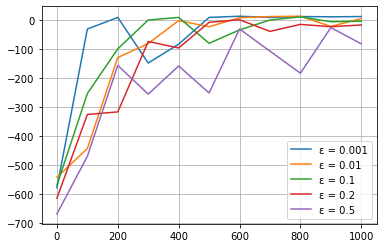

In [39]:
# Try different epsilons
epsilons = [0.001, 0.01, 0.1, 0.2, 0.5]
fig, ax = plt.subplots()

for epsilon in epsilons:
    _, y, x = taxi_qlearning(epsilon=epsilon, epilogues=1000,show_log=False)
    ax.plot(y, x, label=f"ε = {epsilon}")

ax.legend()
ax.grid()
plt.show()

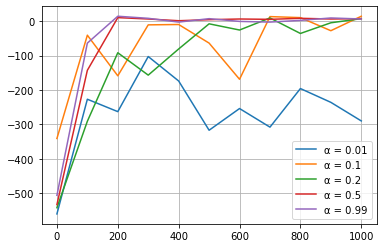

In [44]:
# Try different alpha
alphas = [0.01, 0.1, 0.2, 0.5, 0.99]
fig, ax = plt.subplots()

for alpha in alphas:
    _, y, x = taxi_qlearning(alpha=alpha, epilogues=1000,show_log=False)
    ax.plot(y, x, label=f"α = {alpha}")

ax.legend()
ax.grid()
plt.show()